In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from missingno import matrix
import missingno as msno

# Carga de datos

In [6]:
original = sns.load_dataset('penguins')

In [2]:
df = pd.read_parquet('missing.parquet')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,NaN,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,NaN,13.7,214.0,4925.0,Female
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
339,Gentoo,Biscoe,50.4,15.7,222.0,NaN,Male
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Text(0.5, 1.0, 'Patrón de datos faltantes')

<Figure size 1600x600 with 0 Axes>

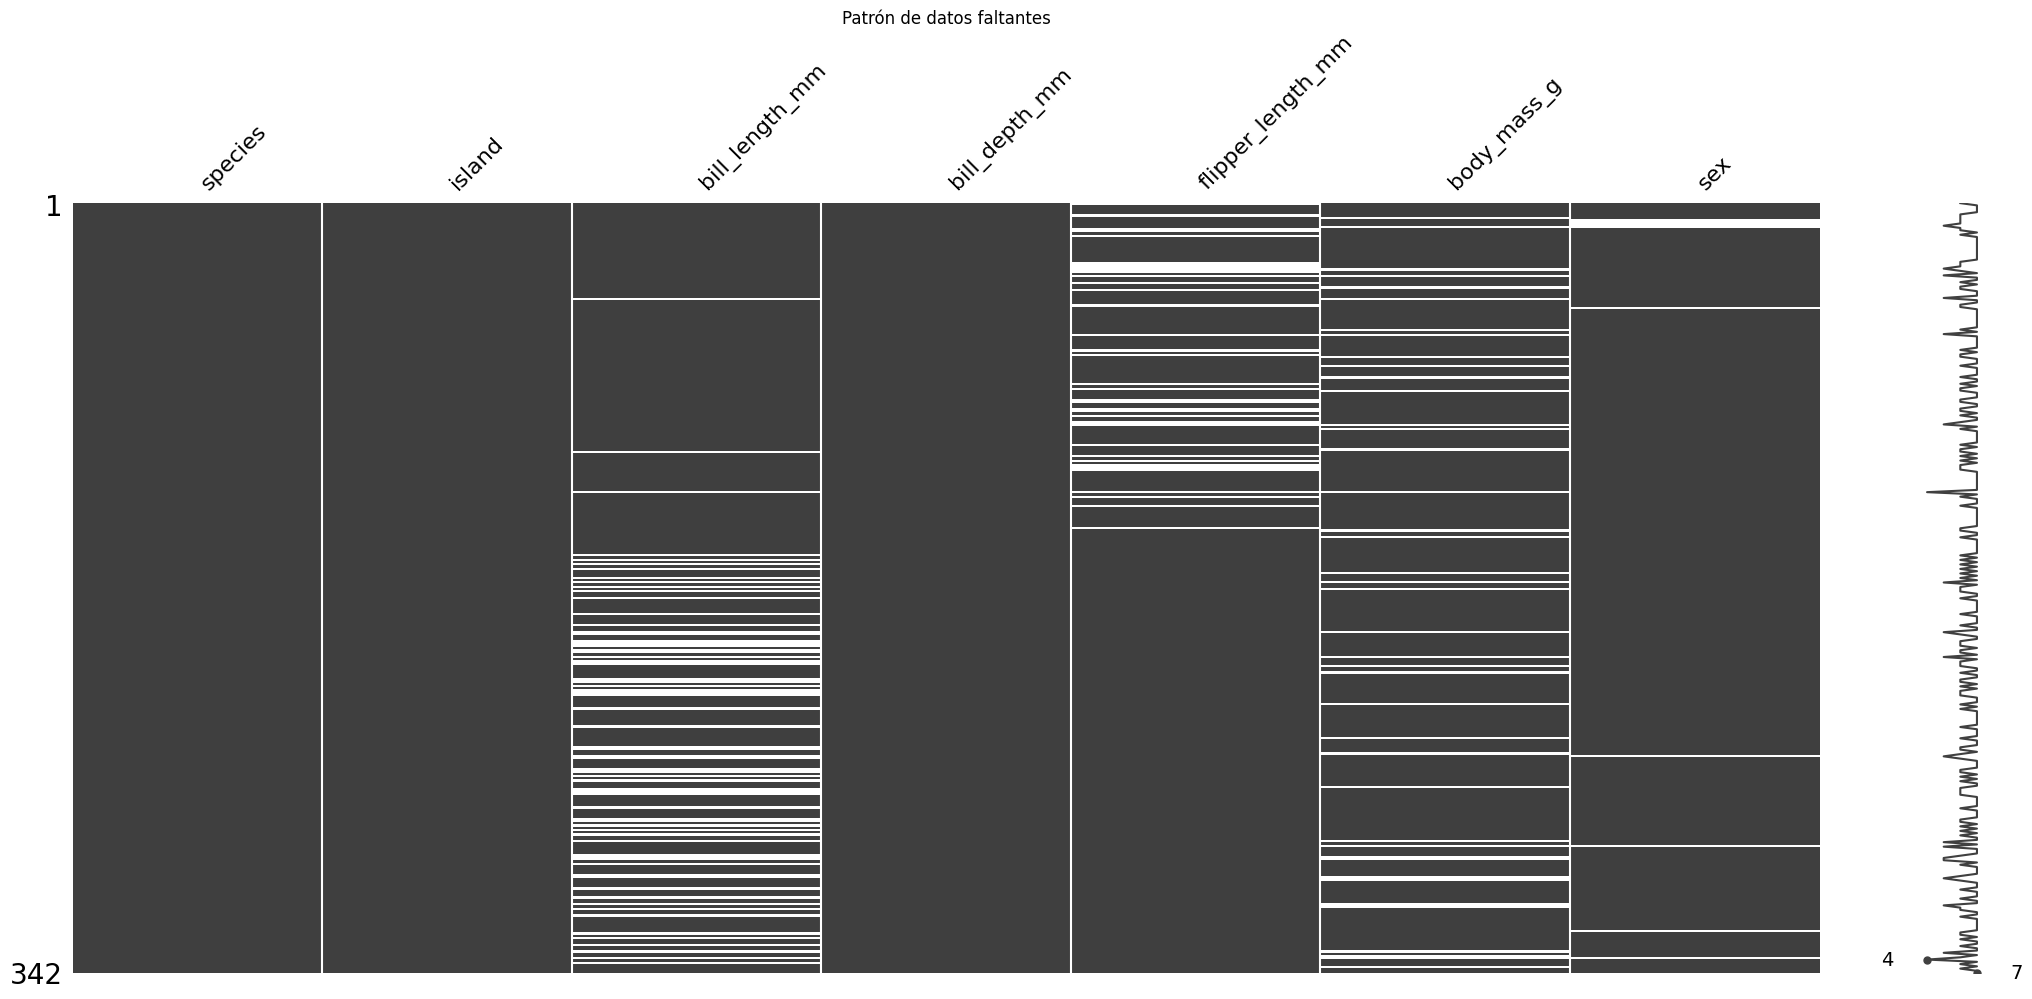

In [3]:
plt.figure(figsize=(16,6))
msno.matrix(df)
plt.title('Patrón de datos faltantes')

<Figure size 1600x600 with 0 Axes>

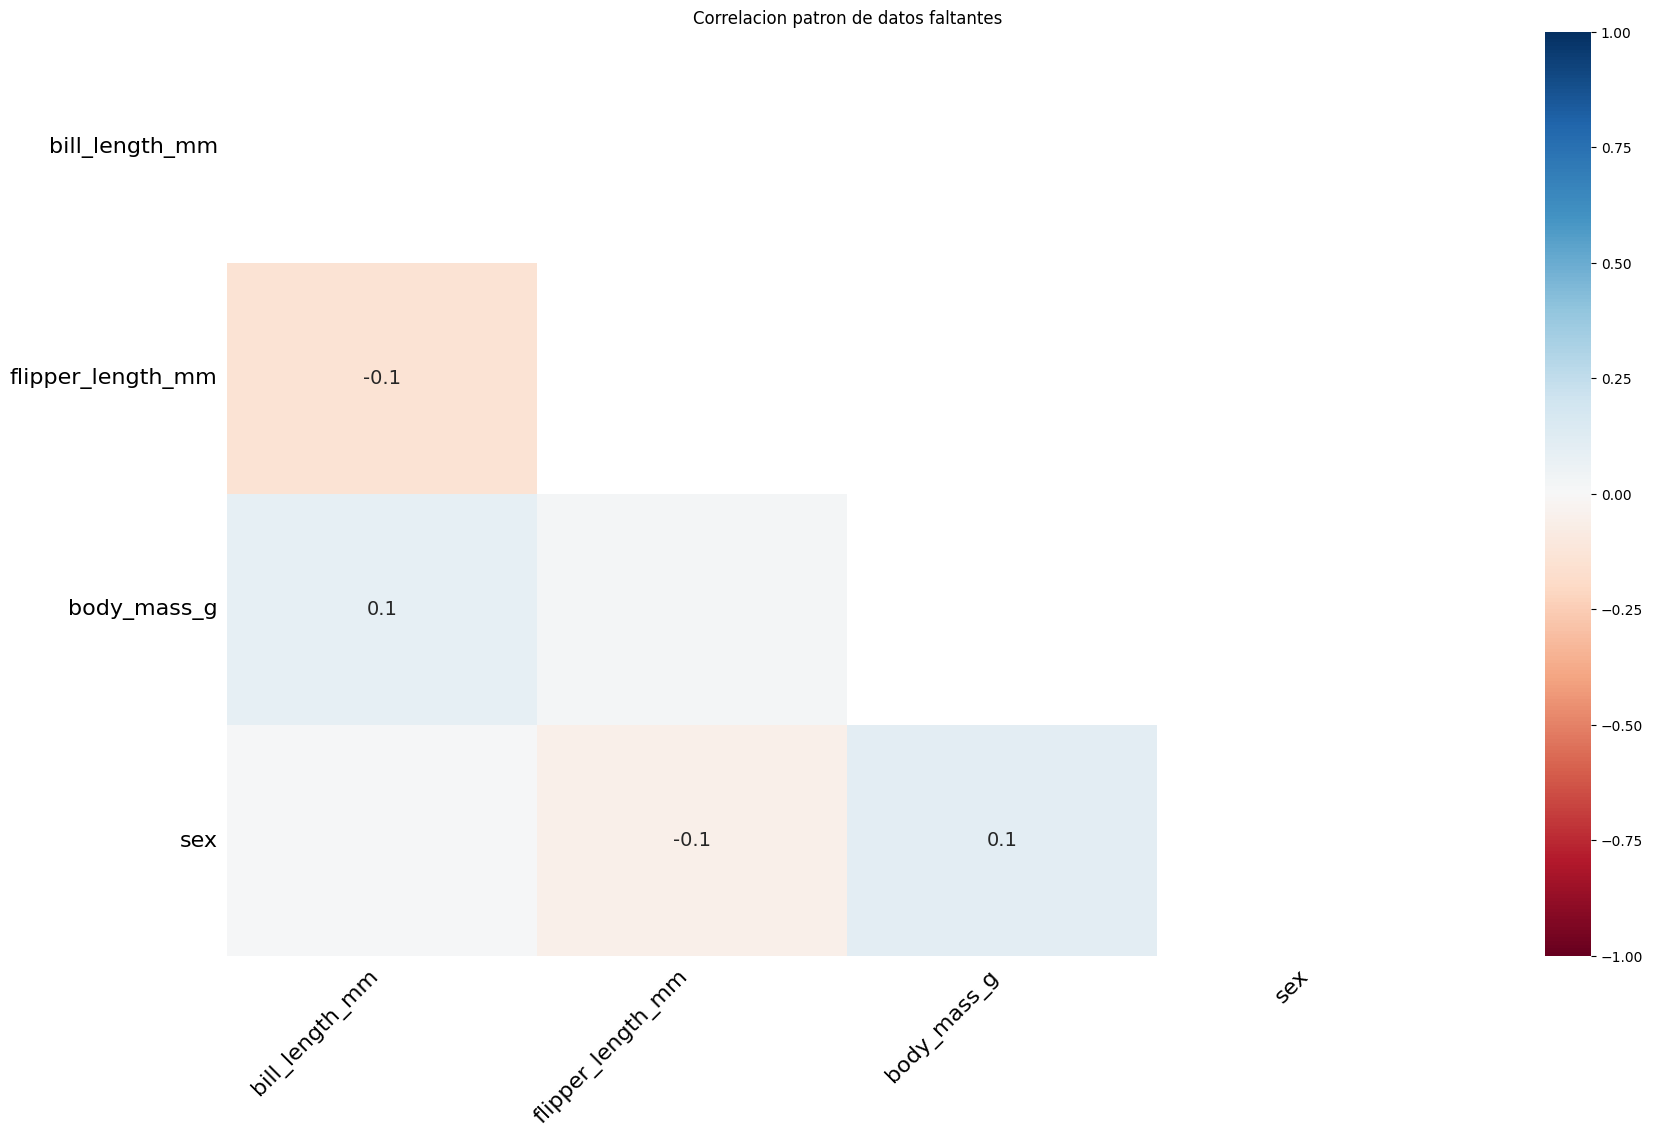

In [4]:
plt.figure(figsize=(16,6))
msno.heatmap(df)
plt.title('Correlacion patron de datos faltantes')
plt.show()

In [7]:
print('Analisis de body_mass_g')
print('Medida de datos from missing',original['body_mass_g'].mean())
print('Media con datos faltantes',
       df['body_mass_g'].drop().mean())


Analisis de body_mass_g
Medida de datos from missing 4201.754385964912


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

# Colummna flipper_length_mm  Mar


In [23]:
print(df.groupby('species')['flipper_length_mm'].apply(lambda x: x.isna().mean() * 100))

species
Adelie       23.84106
Chinstrap     0.00000
Gentoo        0.00000
Name: flipper_length_mm, dtype: float64


# Colummna bill_length_

# Tratamientos

In [ ]:
# 1. Tratamiento MCAR
# pODEMOS USAR IMPUTACION SIMPLE
body_mass_imputed = df ['body_mass_g'].fillna(
    df['body_mass_g'].mean()
)

#2. Trataiemnto Mar
# Usamos imputacion por grupos
flipper_impited = df.groupby('species')['flipper_length_mm'].transform(lambda x: x.fillna(x.mean()))

# 3. Tratamiento Mar
# Aqui necesitariamos metodos mas sostificados, pero podemos mostarar un ejemplo simple

from